In [1]:
# Explanation of prediction output when activation is sigmoid:
# https://forum.freecodecamp.org/t/model-predict-output/470349

import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

BASE_PATH = "../../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"cats_vs_dogs/"
os.system("mkdir -p " + OUTPUT_PATH)

2025-07-26 16:09:18.914136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-26 16:09:18.914169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-26 16:09:18.914898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-26 16:09:18.919925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0

In [2]:
import tensorflow_datasets as tfds

DATA_PATH = "../../../../../local_data/datasets/animals/"
# Initialize the ImageFolder dataset
builder = tfds.ImageFolder(DATA_PATH)

# Print dataset information
metadata=builder.info
print(builder.info)  # This will show the number of examples, labels, etc.

# Create the dataset
# test_dataset = builder.as_dataset(
#     split='test',
#     shuffle_files=True
# )
(train_dataset, test_dataset)= builder.as_dataset(
    split=['train', 'test'],
    shuffle_files=False,
    as_supervised=True
)
print(f"Number of test samples: {test_dataset.cardinality()}")

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='../../../../../local_data/datasets/animals/',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=9, num_shards=1>,
        'train': <SplitInfo num_examples=7, num_shards=1>,
    },
    citation="""""",
)
Number of test samples: 9


2025-07-26 16:09:21.203932: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-26 16:09:21.204240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-26 16:09:21.265188: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
print("test_dataset=",test_dataset)

test_dataset= <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [4]:
for images, labels in test_dataset.take(5):
    print(labels)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


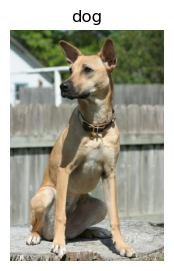

In [5]:
plt.figure(figsize=(3, 3))
for images, labels in test_dataset.take(1):
    plt.imshow(images)
    plt.title(metadata.features['label'].int2str(labels))
    plt.axis("off")

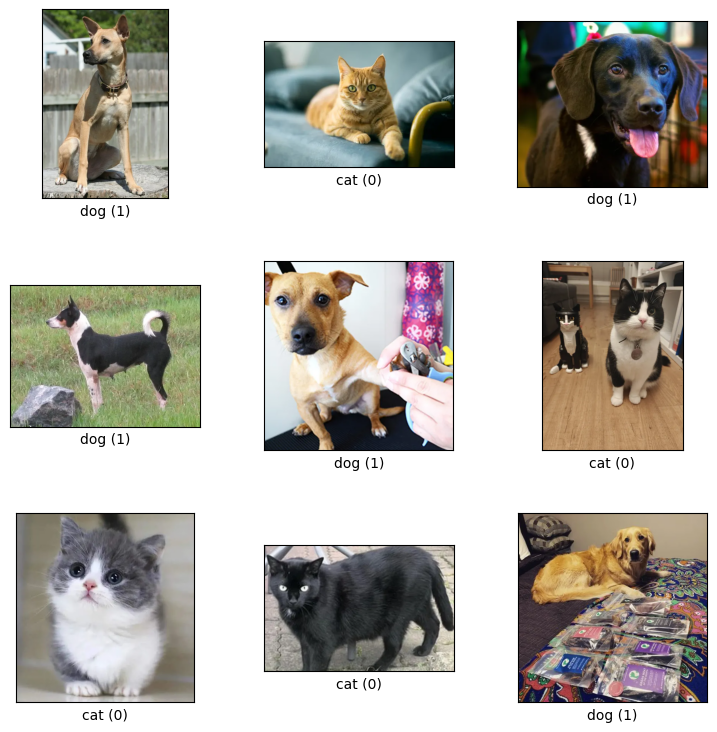

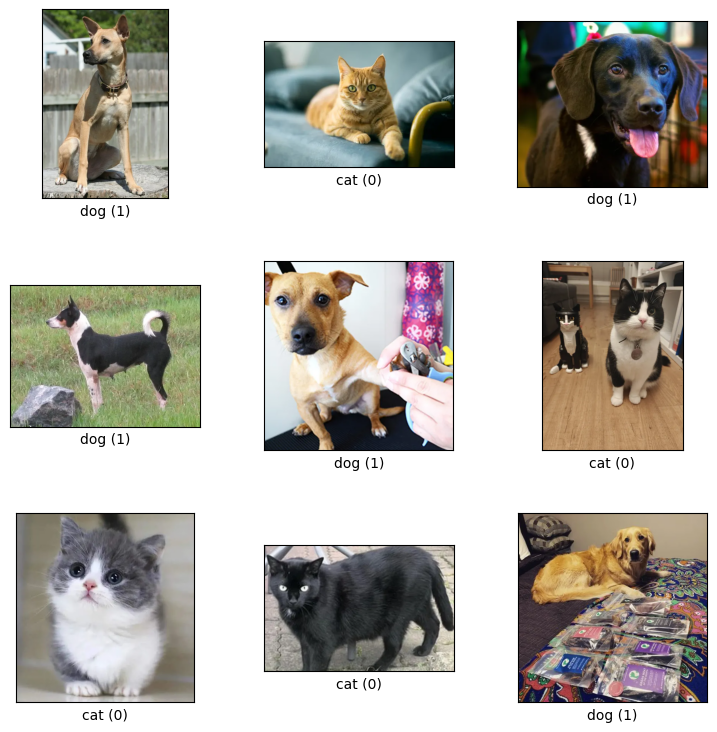

In [6]:
# Display examples
tfds.show_examples(test_dataset, builder.info)

,image,label
0,,1 (dog)
1,,0 (cat)
2,,1 (dog)
3,,1 (dog)
4,,1 (dog)
5,,0 (cat)
6,,0 (cat)
7,,0 (cat)
8,,1 (dog)

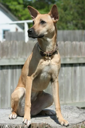
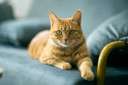
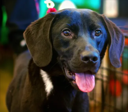
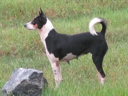
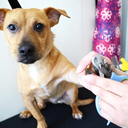
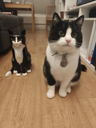
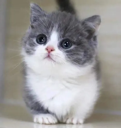
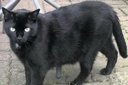
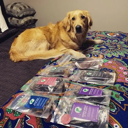

In [7]:
tfds.as_dataframe(test_dataset.take(9), metadata)
